# import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# Data

In [2]:
#개인이 갖고 있는 파일 불러와주세요!
amazon = pd.read_csv('./AmazonFoodCategory Dataset.csv')

-데이터전처리

In [3]:
amazon = amazon[amazon['Discount Amount'] >=0]
amazon = amazon[amazon['Sales Price'] > 0]
amazon = amazon[amazon['Sales Quantity'] > 0]
amazon.drop(['Line Number','Sales Rep','Invoice Date', 'Order Number','Item Number', 'Item Class', 'Promised Delivery Date'], axis = 1, inplace = True)
amazon = amazon[amazon['Sales Cost Amount'] > 0]
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64223 entries, 0 to 65279
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Custkey                           64223 non-null  int64  
 1   DateKey                           64223 non-null  object 
 2   Discount Amount                   64223 non-null  float64
 3   Invoice Number                    64223 non-null  int64  
 4   Item                              64223 non-null  object 
 5   List Price                        64223 non-null  float64
 6   Sales Amount                      64223 non-null  float64
 7   Sales Amount Based on List Price  64223 non-null  float64
 8   Sales Cost Amount                 64223 non-null  float64
 9   Sales Margin Amount               64223 non-null  float64
 10  Sales Price                       64223 non-null  float64
 11  Sales Quantity                    64223 non-null  int64  
 12  U/M      

In [4]:
# 날짜 필터링 

start_date= '2017-01-01'
end_date= '2018-03-21'

amazon['DateKey'] = pd.to_datetime(amazon['DateKey'], format= '%m/%d/%Y')
amazon = amazon[(amazon['DateKey'] >=start_date) & (amazon['DateKey'] <= end_date)]
# sorted(amazon['DateKey'].unique())

amazon.info()
amazon.head(3)


<class 'pandas.core.frame.DataFrame'>
Index: 36307 entries, 28021 to 65279
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           36307 non-null  int64         
 1   DateKey                           36307 non-null  datetime64[ns]
 2   Discount Amount                   36307 non-null  float64       
 3   Invoice Number                    36307 non-null  int64         
 4   Item                              36307 non-null  object        
 5   List Price                        36307 non-null  float64       
 6   Sales Amount                      36307 non-null  float64       
 7   Sales Amount Based on List Price  36307 non-null  float64       
 8   Sales Cost Amount                 36307 non-null  float64       
 9   Sales Margin Amount               36307 non-null  float64       
 10  Sales Price                       36307 non-nul

,Custkey,DateKey,Discount Amount,Invoice Number,Item,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,U/M
28021,10008602,2018-03-21,439.2400,226437,Tell Tale Summer Squash,195.0000,535.76,975.0000,372.26,163.50,107.152000,5,EA
28022,10008602,2018-03-21,1517.3076,226437,Nationeel Avocado Dip,842.0244,1850.79,3368.0976,1256.20,594.59,462.697500,4,EA
28023,10014779,2018-03-21,192.4900,226451,Super White Sugar,157.7600,280.79,473.2800,143.73,137.06,93.596667,3,SE


In [5]:
temp= amazon['Custkey'].value_counts()
print(len(temp[temp > 1]))
# 34292 개의 Custkey 데이터 중에 중복구매한 사용자 수 482
print(len(temp[temp==1]))
# 1인 사람 41개
print(len(temp))

487
42
529


In [6]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36307 entries, 28021 to 65279
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           36307 non-null  int64         
 1   DateKey                           36307 non-null  datetime64[ns]
 2   Discount Amount                   36307 non-null  float64       
 3   Invoice Number                    36307 non-null  int64         
 4   Item                              36307 non-null  object        
 5   List Price                        36307 non-null  float64       
 6   Sales Amount                      36307 non-null  float64       
 7   Sales Amount Based on List Price  36307 non-null  float64       
 8   Sales Cost Amount                 36307 non-null  float64       
 9   Sales Margin Amount               36307 non-null  float64       
 10  Sales Price                       36307 non-nul

In [7]:
print('총 매출: ', round(amazon['Sales Amount'].sum(), 2))
print('총 할인 금액: ', round(amazon['Discount Amount'].sum(), 2))

총 매출:  96803974.11
총 할인 금액:  69436945.25


# 고객별 Sales Amount

In [8]:
cust_m= amazon.groupby('Custkey')['Sales Amount'].sum().reset_index()

cust_m.sort_values(by= 'Sales Amount', ascending= False)

,Custkey,Sales Amount
343,10021485,10949474.37
432,10025024,7951267.71
443,10025052,5419724.38
440,10025039,3259962.46
489,10025919,3250786.04
...,...,...
491,10026009,224.55
272,10019812,221.04
427,10024924,216.33
169,10013039,216.20


In [9]:
# R, F

cust_rf = amazon.groupby('Custkey').agg(
    Last_Purchase=('DateKey', 'max')
    , Frequency=('Invoice Number', 'count') 
).reset_index()

cust_rf

,Custkey,Last_Purchase,Frequency
0,10000453,2017-01-06,10
1,10000455,2017-11-04,19
2,10000456,2017-12-04,23
3,10000457,2017-12-01,3
4,10000458,2018-03-06,4
...,...,...,...
524,10027381,2018-03-14,108
525,10027560,2017-12-26,42
526,10027572,2018-03-20,45
527,10027575,2018-03-06,5


# RFM 523개

In [10]:
cust_rfm= cust_rf.merge(cust_m, on= 'Custkey')

cust_rfm= cust_rfm.rename(columns= {'Last_Purchase': 'Recency',
                          'Sales Amount': 'Monetary'})

In [11]:
cust_rfm.info()
cust_rfm.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Custkey    529 non-null    int64         
 1   Recency    529 non-null    datetime64[ns]
 2   Frequency  529 non-null    int64         
 3   Monetary   529 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 16.7 KB


,Custkey,Recency,Frequency,Monetary
0,10000453,2017-01-06,10,8422.15
1,10000455,2017-11-04,19,22403.73
2,10000456,2017-12-04,23,104994.68


In [12]:
# recency datetime으로 변환
cust_rfm['Recency']= pd.to_datetime(cust_rfm['Recency'])

# 2018 03 22을 현재날짜로 설정, 가장 최근의 주문 일자를 뺌
cust_rfm['Recency']= dt.datetime(2018, 3, 22) - cust_rfm['Recency']
# 01로 하니까 오류남

# +1
cust_rfm['Recency']= cust_rfm['Recency'].apply(lambda x:x.days+1)

cust_rfm

,Custkey,Recency,Frequency,Monetary
0,10000453,441,10,8422.15
1,10000455,139,19,22403.73
2,10000456,109,23,104994.68
3,10000457,112,3,14284.80
4,10000458,17,4,4994.49
...,...,...,...,...
524,10027381,9,108,70994.97
525,10027560,87,42,48482.74
526,10027572,3,45,46290.99
527,10027575,17,5,3548.62


In [13]:
cust_rfm['Monetary'] = cust_rfm['Monetary'].astype(int)

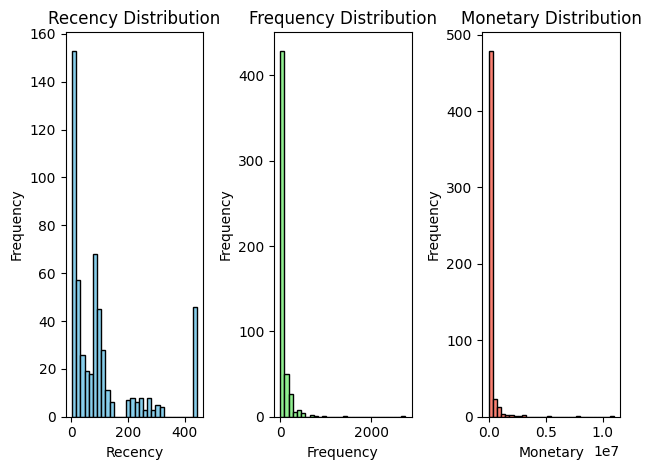

In [14]:
plt.subplot(1,3,1)
plt.hist(cust_rfm['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency Distribution')

plt.subplot(1,3,2)
plt.hist(cust_rfm['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
plt.hist(cust_rfm['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

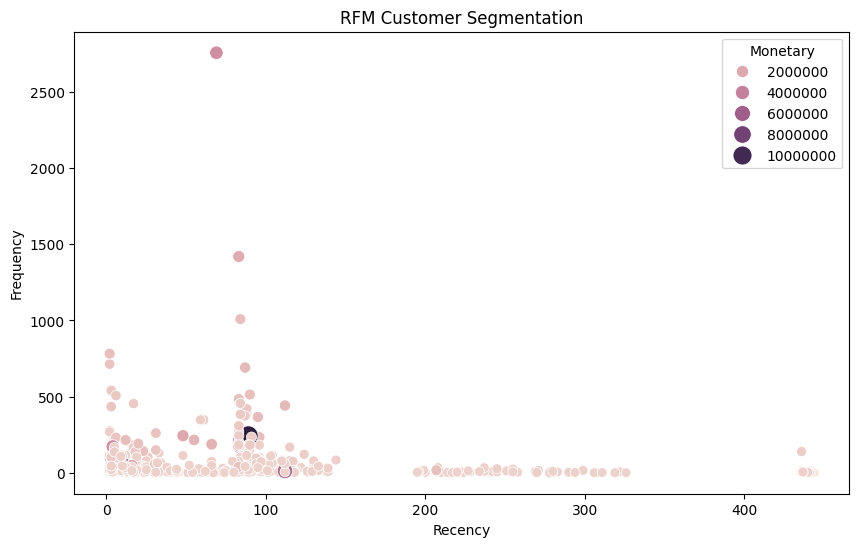

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Recency', y='Frequency', hue='Monetary', data=cust_rfm, size='Monetary', sizes=(50,200))
plt.title('RFM Customer Segmentation')
plt.show()

# 데이터 스케일링

In [16]:
cust_rfm_drop = cust_rfm.drop(columns='Custkey')

In [17]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

In [18]:
rb = PowerTransformer(method='box-cox')
mm = MinMaxScaler()
amazon_rfm_rb = pd.DataFrame(rb.fit_transform(cust_rfm_drop), columns=cust_rfm_drop.columns)
amazon_scaled = pd.DataFrame(mm.fit_transform(amazon_rfm_rb), columns=cust_rfm_drop.columns)

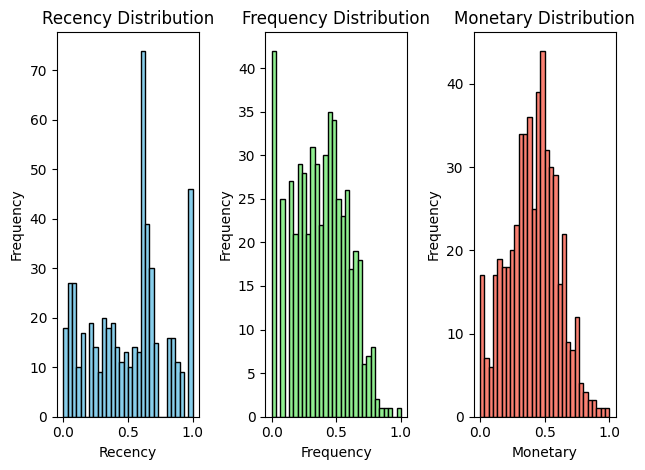

In [19]:
plt.subplot(1,3,1)
plt.hist(amazon_scaled['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency Distribution')

plt.subplot(1,3,2)
plt.hist(amazon_scaled['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
plt.hist(amazon_scaled['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

# K-Means 클러스터링

In [20]:
#!pip install yellowbrick

In [21]:
from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [22]:
kmeans = KMeans(random_state=42)
# elbow = KElbowVisualizer(kmeans, k=(1,11))
# elbow.fit(amazon_scaled)
# elbow.show()

엘보우메서드 -> 결과 4개

-The KElbowVisualizer also displays the amount of time to train the clustering model per "K" as a dashed green line, but is can be hidden by setting (timings=False). 
-score: SSE(Sum of Square Errors)

In [23]:
kmeans_4 = KMeans(4, random_state=42)
# visualizer = SilhouetteVisualizer(kmeans_4, colors='yellowbrick')
# visualizer.fit(amazon_scaled)
# visualizer.show()

실루엣 계수: k=4일 때 0.4정도

In [24]:
k=4
kmeans_4 = KMeans(4, random_state=4)
kmeans_4.fit(amazon_scaled)
cluster = kmeans_4.labels_

In [25]:
amazon_scaled['cluster']=cluster
amazon_kmeans =amazon_scaled.copy()
amazon_kmeans

,Recency,Frequency,Monetary,cluster
0,0.998269,0.294586,0.309493,1
1,0.724102,0.376125,0.396361,2
2,0.671295,0.400348,0.538056,2
3,0.677112,0.140959,0.356128,1
4,0.317094,0.177748,0.263980,3
...,...,...,...,...
524,0.213750,0.595621,0.501626,0
525,0.623758,0.476548,0.466470,2
526,0.053682,0.485265,0.462229,0
527,0.317094,0.206249,0.234539,3


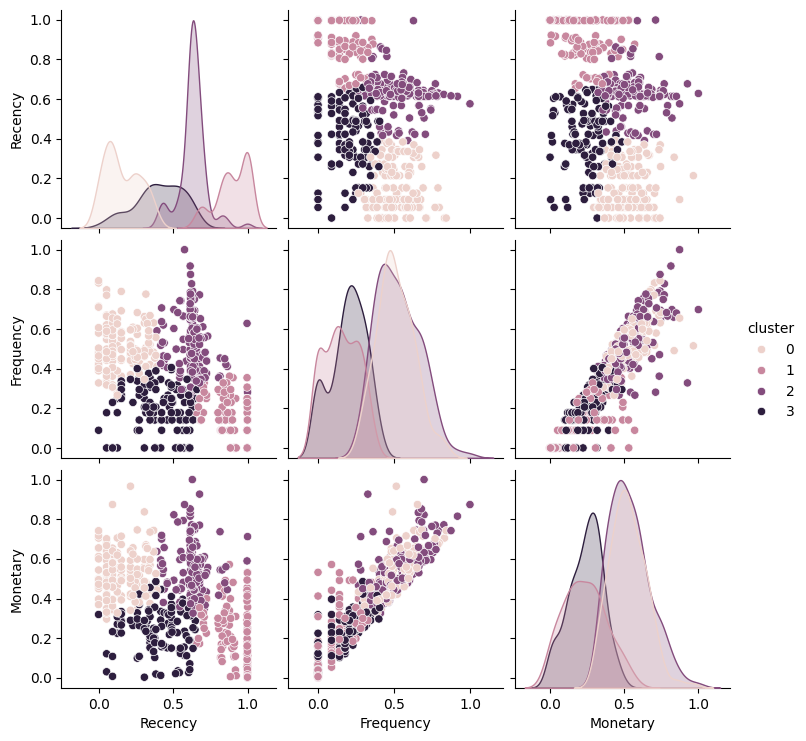

In [26]:
sns.pairplot(amazon_kmeans, hue='cluster')
plt.show()

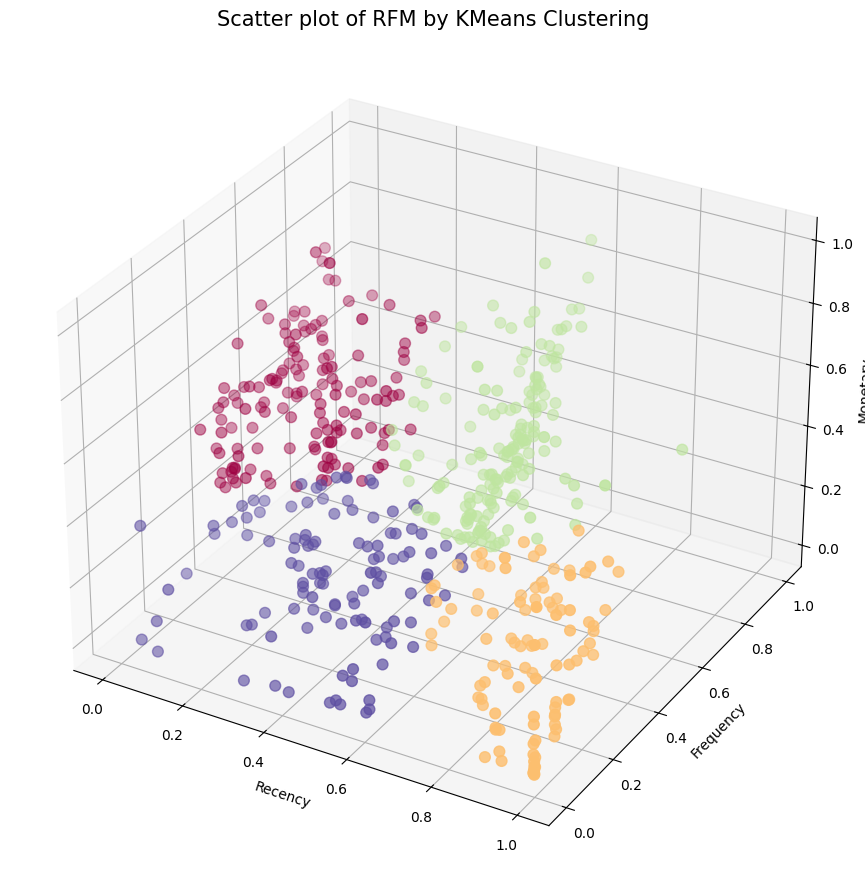

In [27]:
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(amazon_kmeans['Recency'], amazon_kmeans['Frequency'], amazon_kmeans['Monetary'], c=amazon_kmeans['cluster'], s=60, depthshade= True, cmap='Spectral')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Scatter plot of RFM by KMeans Clustering', fontsize = 15)
plt.tight_layout()
plt.show()

In [28]:
amazon_kmeans

,Recency,Frequency,Monetary,cluster
0,0.998269,0.294586,0.309493,1
1,0.724102,0.376125,0.396361,2
2,0.671295,0.400348,0.538056,2
3,0.677112,0.140959,0.356128,1
4,0.317094,0.177748,0.263980,3
...,...,...,...,...
524,0.213750,0.595621,0.501626,0
525,0.623758,0.476548,0.466470,2
526,0.053682,0.485265,0.462229,0
527,0.317094,0.206249,0.234539,3


<Figure size 500x300 with 0 Axes>

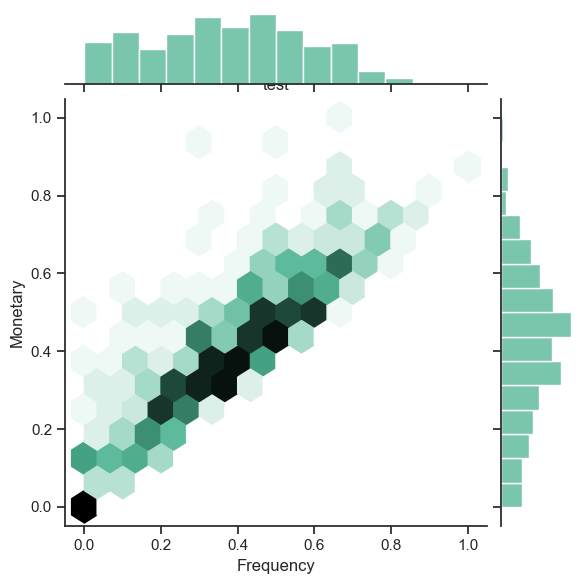

In [29]:
plt.figure(figsize=(5, 3))

sns.set_theme(style= 'ticks')
sns.jointplot(data= amazon_kmeans, y='Monetary', x = 'Frequency', kind= 'hex', color="#4CB391")

plt.title('test')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

/var/folders/v7/v961g5xd3bj5j5xzyv_25fpc0000gn/T/ipykernel_59270/2416677817.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data= amazon_kmeans, y='Recency', x = 'cluster', palette='viridis')


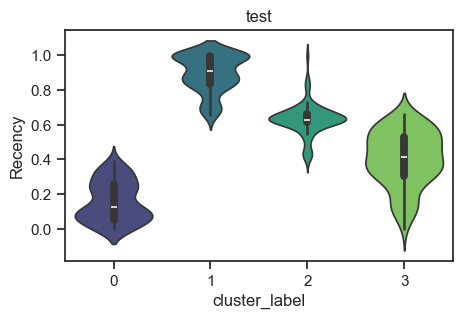

In [30]:
plt.figure(figsize=(5, 3))

sns.violinplot(data= amazon_kmeans, y='Recency', x = 'cluster', palette='viridis')

plt.title('test')
plt.xlabel('cluster_label')
plt.ylabel('Recency')
plt.show()

/var/folders/v7/v961g5xd3bj5j5xzyv_25fpc0000gn/T/ipykernel_59270/3602659956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data= amazon_kmeans, y='Frequency', x = 'cluster', palette='viridis')


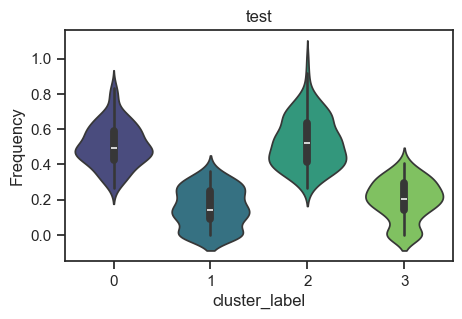

In [31]:
plt.figure(figsize=(5, 3))

sns.violinplot(data= amazon_kmeans, y='Frequency', x = 'cluster', palette='viridis')

plt.title('test')
plt.xlabel('cluster_label')
plt.ylabel('Frequency')
plt.show()

/var/folders/v7/v961g5xd3bj5j5xzyv_25fpc0000gn/T/ipykernel_59270/2490523928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data= amazon_kmeans, y='Monetary', x = 'cluster', palette='viridis')


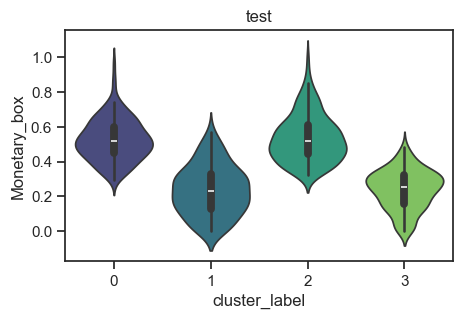

In [32]:
plt.figure(figsize=(5, 3))

sns.violinplot(data= amazon_kmeans, y='Monetary', x = 'cluster', palette='viridis')

plt.title('test')
plt.xlabel('cluster_label')
plt.ylabel('Monetary_box')
plt.show()

# 장바구니 카테고리

In [33]:
amma_ca = pd.read_csv('./AmazonFoodCategory Dataset.csv')

amma_ca.head()

amma_ca = amma_ca[amma_ca['Discount Amount'] >=0]
amma_ca = amma_ca[amma_ca['Sales Price'] > 0]
amma_ca = amma_ca[amma_ca['Sales Quantity'] > 0]
amma_ca.drop(['Line Number','Sales Rep','Invoice Date', 'Order Number','Item Number', 'Item Class', 'Promised Delivery Date'], axis = 1, inplace = True)
amma_ca = amma_ca[amma_ca['Sales Cost Amount'] > 0]

# 날짜 필터링 

start_date= '2017-01-01'
end_date= '2018-03-21'

amazon['DateKey'] = pd.to_datetime(amazon['DateKey'], format= '%m/%d/%Y')
amazon = amazon[(amazon['DateKey'] >=start_date) & (amazon['DateKey'] <= end_date)]
# sorted(amazon['DateKey'].unique())

amazon.info()
amazon.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 36307 entries, 28021 to 65279
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           36307 non-null  int64         
 1   DateKey                           36307 non-null  datetime64[ns]
 2   Discount Amount                   36307 non-null  float64       
 3   Invoice Number                    36307 non-null  int64         
 4   Item                              36307 non-null  object        
 5   List Price                        36307 non-null  float64       
 6   Sales Amount                      36307 non-null  float64       
 7   Sales Amount Based on List Price  36307 non-null  float64       
 8   Sales Cost Amount                 36307 non-null  float64       
 9   Sales Margin Amount               36307 non-null  float64       
 10  Sales Price                       36307 non-nul

,Custkey,DateKey,Discount Amount,Invoice Number,Item,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,U/M
28021,10008602,2018-03-21,439.2400,226437,Tell Tale Summer Squash,195.0000,535.76,975.0000,372.26,163.50,107.152000,5,EA
28022,10008602,2018-03-21,1517.3076,226437,Nationeel Avocado Dip,842.0244,1850.79,3368.0976,1256.20,594.59,462.697500,4,EA
28023,10014779,2018-03-21,192.4900,226451,Super White Sugar,157.7600,280.79,473.2800,143.73,137.06,93.596667,3,SE


In [34]:
amma_ca['Item'].value_counts()

Item
Better Fancy Canned Sardines    1619
Ebony Prepared Salad            1460
Moms Sliced Turkey              1188
Imagine Popsicles               1174
Discover Manicotti              1125
                                ... 
Great White Bread                  1
Kiwi Lox                           1
Best Choice Sesame Crackers        1
Gorilla Buttermilk                 1
Great Bagels                       1
Name: count, Length: 623, dtype: int64

In [35]:
# 각 제품을 카테고리에 매핑하기 위한 딕셔너리 생성
category_mapping = {
    # 육류 및 단백질 제품
    'meat_and_protein' : [
        "Hot Dogs", "Sliced Turkey", "Beef Bologna", "Sliced Ham",
        "Chicken Thighs", "Pimento Loaf", "Canned Shrimp", "Fat Bologna",
        "Canned Sardines", "Chicken Wings", "Corned Beef", "Roasted Chicken",
        "Seasoned Hamburger", "Beef Soup", "Chicken Soup", "Canned Oysters",
        "Canned Clams", "Kiwi Scallops", "Beef Jerky", "Firm Tofu",  "TV Dinner"
        "Fat Bologna", "Corned Beef", "TV Dinner", "Canned Anchovies", "Corned Beef"
    ],
    # 유제품 및 치즈
    'dairy_and_cheese' : [
        "Cheddar Cheese", "Cheese Spread", "Jack Cheese", "Muenster Cheese",
        "Cottage Cheese", "Cream Sandwich", "String Cheese", "Havarti Cheese",
        "Chocolate Milk", "1% Milk", "2% Milk", "Whole Milk", "Better Buttermilk", "Havarti Cheese",
        "Carlson Buttermilk", "Head Cheese", "String Cheese", "Chocolate Milk", "Ice Cream",
        "Blueberry Yogurt", "Apple Butter", "Strawberry Yogurt", "Peanut Butter", "Peanut Butter"
        "Peanut Butter", "Peanut Butter"
    ],
    # 곡류 및 빵류
    'grains_and_breads' : [
        "Wheat Bread", "Pumpernickel Bread", "Rye Bread", "French Fries", "Fudge Brownies",
        "Frozen Pancakes", "Pancake Mix", "Cinnamon Waffles", "Frozen Corn", "Top Walnuts",
        "Golden Waffles", "Fat Waffles", "Cinnamon Waffles", "Golden Waffles", "Fat Waffles"
        "Tale Almonds", "Graham Crackers", "Frosted Donuts", "Great Muffins", "Special Oatmeal",
        "Colony Bagels", "Frozen Peas", "Top Walnuts", "Cranberry Muffins", "Great Muffins"
        "Frozen Pancakes", "Pimento Loaf", "Frozen Pancakes", "Corn Puffs",  "Canned Peas"
    ],
    # 음료류
    'beverages' : [
        "Apple Drink", "Mango Drink", "Berry Juice", "Orange Juice",
        "Cranberry Juice", "Lime Popsicles", "Mango Drink",
        "Cream Soda", "Token Cola", "Fabulous Cola", "Regular Coffee",
        "Columbian Coffee", "Decaf Coffee", "Light Beer", "Imported Beer",
        "Pearl Chardonnay", "Zinfandel Wine", "Chardonnay Wine", "Merlot Wine",
        "Walrus Chardonnay", "Peanut Butter", "Ebony Squash", "Summer Squash",
        "Cranberry Juice", "Washington Cola"
    ],
    # 과일 및 채소
    'fruits_and_vegetables' : [
        "Macintosh Apples", "Fuji Apples", "Dried Apples", "Dried Mushrooms",
        "Canned Yams", "Canned Tomatos", "Canned Beets", "Ebony Tangerines",
        "Canned Peas", "Frozen Carrots", "Top Oranges",
        "Ebony Mushrooms", "Mandarin Oranges", "Ebony Oranges", "Top Cauliflower",
        "Frozen Broccoli", "Frozen Peas", "Cole Slaw", "Top Onions",
        "Frozen Corn", "Ebony Peaches", "Green Pepper", "Best Pepper",
        "Ebony Cantelope", "Shitake Mushrooms", "Tale Limes", "Frozen Broccoli"
        "Prepared Salad", "Potato Salad", "Macintosh Apples", "Top Cauliflower"
    ],
    # 디저트 및 스낵류
    'desserts_and_snacks' : [
        "Chocolate Bar", "Potato Chips", "Butter Popcorn", "Fat Popcorn",
        "Sugar Cookies", "Fat Cookies", "Corn Chips",
        "Frosted Cookies", "Ice Cream", "Chocolate Donuts",
        "Cream Sandwich", "Time Popsicles", "Bubble Gum", "Fudge Cookies",
        "Apple Jelly", "Potato Chips", "Salted Pretzels", "Corn Chips", "Sugar Cookies",
        "Creamed Corn", "Milk Balls", "BBQ Chips",  "Grape Jelly", "Strawberry Jelly", "Corn Chips"
    ],
    # 가공식품 및 조리식품
    'processed_foods' : [
        "Ramen Soup", "French Fries",
        "Beef Soup", "Rice Soup", "Cheese Pizza",
        "Sausage Pizza", "Cheese Pizza",
        "Rice Medly"
    ],
    # 조미료 및 향신료
    'condiments_and_spices' : [
        "Apple Jam", "Sesame Oil", "Sour Cream",
        "Apple Preserves",
        "Tale Oregano", "Best Salt",
        "Landslide Oregano",
        "Radius Grits", "Landslide Salt",
        "Cheese Dip", "Apple Preserves", "Strawberry Preserves", "Strawberry Jam",
        "Cheese Dip"
    ]
}
# 제품 이름을 카테고리로 매핑하는 함수 정의
def categoize_item(item):
    for category, items in category_mapping.items():
        if item in items:
            return category
    return 'ETC'
# 데이터 프레임에 'Category' 컬럼 추가
amma_ca['Category'] = amma_ca['Item'].apply(categoize_item)
amma_ca.head()

,Custkey,DateKey,Discount Amount,Invoice Number,Item,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,U/M,Category
0,10016609,12/31/2019,398.73,329568,Super Vegetable Oil,163.47,418.62,817.35,102.99,315.63,83.72400,5,EA,ETC
1,10016609,12/31/2019,268.67,329569,Golden Fajita French Fries,275.37,282.07,550.74,117.45,164.62,141.03500,2,EA,ETC
2,10016609,12/31/2019,398.73,329569,Super Vegetable Oil,163.47,418.62,817.35,102.99,315.63,83.72400,5,EA,ETC
3,10016609,12/31/2019,466.45,329569,High Top Oranges,119.52,489.71,956.16,213.29,276.42,61.21375,8,EA,ETC
4,10016609,12/31/2019,515.51,329569,Tell Tale New Potatos,264.18,541.21,1056.72,290.56,250.65,135.30250,4,EA,ETC


In [36]:
amma_ca['Category'].value_counts()

Category
ETC                      61115
beverages                 1812
grains_and_breads          544
fruits_and_vegetables      490
condiments_and_spices      168
dairy_and_cheese            62
meat_and_protein            32
Name: count, dtype: int64

In [37]:
# # 육류 및 단백질 제품
# meat_and_protein = [
#     "Hot Dogs", "Sliced Turkey", "Beef Bologna", "Sliced Ham",
#     "Chicken Thighs", "Pimento Loaf", "Canned Shrimp", "Fat Bologna",
#     "Canned Sardines", "Chicken Wings", "Corned Beef", "Roasted Chicken",
#     "Seasoned Hamburger", "Beef Soup", "Chicken Soup", "Canned Oysters",
#     "Canned Clams", "Kiwi Scallops", "Beef Jerky", "Firm Tofu",  "TV Dinner"
#     "Fat Bologna", "Corned Beef", "TV Dinner", "Canned Anchovies", "Corned Beef"
# ]
# # 유제품 및 치즈
# dairy_and_cheese = [
#     "Cheddar Cheese", "Cheese Spread", "Jack Cheese", "Muenster Cheese",
#     "Cottage Cheese", "Cream Sandwich", "String Cheese", "Havarti Cheese",
#     "Chocolate Milk", "1% Milk", "2% Milk", "Whole Milk", "Better Buttermilk", "Havarti Cheese",
#     "Carlson Buttermilk", "Head Cheese", "String Cheese", "Chocolate Milk", "Ice Cream",
#     "Blueberry Yogurt", "Apple Butter", "Strawberry Yogurt", "Peanut Butter", "Peanut Butter"
#     "Peanut Butter", "Peanut Butter"
# ]
# # 곡류 및 빵류
# grains_and_breads = [
#     "Wheat Bread", "Pumpernickel Bread", "Rye Bread", "French Fries", "Fudge Brownies",
#     "Frozen Pancakes", "Pancake Mix", "Cinnamon Waffles", "Frozen Corn", "Top Walnuts",
#     "Golden Waffles", "Fat Waffles", "Cinnamon Waffles", "Golden Waffles", "Fat Waffles"
#     "Tale Almonds", "Graham Crackers", "Frosted Donuts", "Great Muffins", "Special Oatmeal",
#     "Colony Bagels", "Frozen Peas", "Top Walnuts", "Cranberry Muffins", "Great Muffins"
#     "Frozen Pancakes", "Pimento Loaf", "Frozen Pancakes", "Corn Puffs",  "Canned Peas"
# ]
# # 음료류
# beverages = [
#     "Apple Drink", "Mango Drink", "Berry Juice", "Orange Juice",
#     "Cranberry Juice", "Lime Popsicles", "Mango Drink",
#     "Cream Soda", "Token Cola", "Fabulous Cola", "Regular Coffee",
#     "Columbian Coffee", "Decaf Coffee", "Light Beer", "Imported Beer",
#     "Pearl Chardonnay", "Zinfandel Wine", "Chardonnay Wine", "Merlot Wine",
#     "Walrus Chardonnay", "Peanut Butter", "Ebony Squash", "Summer Squash",
#     "Cranberry Juice", "Washington Cola"
# ]
# # 과일 및 채소
# fruits_and_vegetables = [
#     "Macintosh Apples", "Fuji Apples", "Dried Apples", "Dried Mushrooms",
#     "Canned Yams", "Canned Tomatos", "Canned Beets", "Ebony Tangerines",
#     "Canned Peas", "Frozen Carrots", "Top Oranges",
#     "Ebony Mushrooms", "Mandarin Oranges", "Ebony Oranges", "Top Cauliflower",
#     "Frozen Broccoli", "Frozen Peas", "Cole Slaw", "Top Onions",
#     "Frozen Corn", "Ebony Peaches", "Green Pepper", "Best Pepper",
#     "Ebony Cantelope", "Shitake Mushrooms", "Tale Limes", "Frozen Broccoli"
#     "Prepared Salad", "Potato Salad", "Macintosh Apples", "Top Cauliflower"
# ]
# # 디저트 및 스낵류
# desserts_and_snacks = [
#     "Chocolate Bar", "Potato Chips", "Butter Popcorn", "Fat Popcorn",
#     "Sugar Cookies", "Fat Cookies", "Corn Chips",
#     "Frosted Cookies", "Ice Cream", "Chocolate Donuts",
#     "Cream Sandwich", "Time Popsicles", "Bubble Gum", "Fudge Cookies",
#     "Apple Jelly", "Potato Chips", "Salted Pretzels", "Corn Chips", "Sugar Cookies",
#     "Creamed Corn", "Milk Balls", "BBQ Chips",  "Grape Jelly", "Strawberry Jelly", "Corn Chips"
# ]
# # 가공식품 및 조리식품
# processed_foods = [
#     "Ramen Soup", "French Fries",
#     "Beef Soup", "Rice Soup", "Cheese Pizza",
#     "Sausage Pizza", "Cheese Pizza",
#     "Rice Medly"
# ]
# # 조미료 및 향신료
# condiments_and_spices = [
#     "Apple Jam", "Sesame Oil", "Sour Cream",
#     "Apple Preserves",
#     "Tale Oregano", "Best Salt",
#     "Landslide Oregano",
#     "Radius Grits", "Landslide Salt",
#     "Cheese Dip", "Apple Preserves", "Strawberry Preserves", "Strawberry Jam",
#     "Cheese Dip"
# ]

In [38]:
amma_ca['Item Last'] = amma_ca['Item'].apply(lambda x:' '.join(x.split(' ')[-2:]))
amma_ca['Item Last'].value_counts()

Item Last
Hot Dogs              3057
Canned Sardines       1825
String Cheese         1544
Prepared Salad        1525
Sliced Turkey         1199
                      ... 
Atomic Mints             3
Monarch Manicotti        2
Kiwi Lox                 1
Gorilla Buttermilk       1
Great Bagels             1
Name: count, Length: 275, dtype: int64

In [39]:
# def categorizing(df):
#     for i in range(len(df)):
#         if df['Item Last'][i] in meat_and_protein:
#             return 'Meat&Seafood'
#         elif df['Item Last'][i] in dairy_and_cheese:
#             return 'Dairy'
#         elif df['Item Last'][i] in fruits_and_vegetables:
#             return 'Vegetable'
#         elif df['Item Last'][i] in grains_and_breads:
#             return 'Grain&Bakery'
#         elif df['Item Last'][i] in beverages:
#             return 'Beverages'
#         elif df['Item Last'][i] in condiments_and_spices:
#             return 'Condiments'
#         elif df['Item Last'][i] in desserts_and_snacks:
#             return 'Snack'
#         else:
#             return '기타'


# amma_ca['Category']= amma_ca.apply(categorizing, axis= 1)

In [62]:
amma_ca['Item'].value_counts().sort_values()

Item
Great Bagels                       1
Great White Bread                  1
Gorilla Buttermilk                 1
Best Choice Sesame Crackers        1
Kiwi Lox                           1
                                ... 
Discover Manicotti              1125
Imagine Popsicles               1174
Moms Sliced Turkey              1188
Ebony Prepared Salad            1460
Better Fancy Canned Sardines    1619
Name: count, Length: 623, dtype: int64

In [93]:
amma_ca= pd.read_csv('./실프_4일차_태우님amz_category.csv')

amma_ca[['Category', 'Item Last', 'Item']].value_counts()

Category   Item Last           Item                        
Seafood    Canned Sardines     Better Fancy Canned Sardines    908
Vegetable  Prepared Salad      Ebony Prepared Salad            813
Meat       Sliced Turkey       Moms Sliced Turkey              665
Snack      Imagine Popsicles   Imagine Popsicles               655
Mealkits   Discover Manicotti  Discover Manicotti              644
                                                              ... 
Vegetable  Shitake Mushrooms   Tell Tale Shitake Mushrooms       1
Snack      Chocolate Bar       Choice White Chocolate Bar        1
Beverage   Hot Chocolate       Super Hot Chocolate               1
Condiment  White Sugar         BBB Best White Sugar              1
Dairy      Strawberry Yogurt   Club Strawberry Yogurt            1
Name: count, Length: 621, dtype: int64

In [98]:
amma_ca[['Category', 'Item Last', 'Item']].drop_duplicates().tail(40)

,Category,Item Last,Item
21539,Vegetable,Canned Tomatos,Just Right Canned Tomatos
21540,Condiment,Red Pepper,Tell Tale Red Pepper
21768,Condiment,Strawberry Jam,Landslide Strawberry Jam
21893,Snack,Candy Bar,Choice Tasty Candy Bar
21897,Snack,Salt Popcorn,Best Choice No Salt Popcorn
21898,Snack,Milk Balls,Choice Malted Milk Balls
21932,Condiment,Grape Preserves,Super Grape Preserves
21950,Seafood,in Oil,Bravo Canned Tuna in Oil
21990,Snack,Sesame Crackers,Best Choice Sesame Crackers
22307,Nuts,Canned Peas,Just Right Canned Peas


# cluster 결과 merge
- amazon_kmeans, cust_rfm

In [67]:
amazon_rfm_cluster= pd.concat([cust_rfm, amazon_kmeans], axis=1)
amazon_rfm_cluster.columns= ['Custkey', 'Recency', 'Frequency', 'Monetary', 'Recency_sc', 'Frequency_sc', 'Monetary_sc', 'cluster']

529

In [99]:
amazon_kmeans['cluster'].value_counts()

cluster
2    169
0    142
3    115
1    103
Name: count, dtype: int64

In [100]:
amazon_merged['cluster'].value_counts()

cluster
2    22219
0    12846
3      760
1      482
Name: count, dtype: int64

In [45]:
amazon_merged= pd.merge(amazon, amazon_rfm_cluster, on= 'Custkey')

In [46]:
amazon_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36307 entries, 0 to 36306
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           36307 non-null  int64         
 1   DateKey                           36307 non-null  datetime64[ns]
 2   Discount Amount                   36307 non-null  float64       
 3   Invoice Number                    36307 non-null  int64         
 4   Item                              36307 non-null  object        
 5   List Price                        36307 non-null  float64       
 6   Sales Amount                      36307 non-null  float64       
 7   Sales Amount Based on List Price  36307 non-null  float64       
 8   Sales Cost Amount                 36307 non-null  float64       
 9   Sales Margin Amount               36307 non-null  float64       
 10  Sales Price                       36307 non-nu

- 각 군집별 item과 quantity?
- sales amount 평균
- 객단가.... 계산 필요
: 총수익 / 사용자 수
[cluster==2]['sales amount'].sum() / [cluster==2].nunique()

## 군집별

In [79]:
# Quantity
print(amazon_merged[amazon_merged['cluster'] == 2]['Sales Quantity'].mean())
print(amazon_merged[amazon_merged['cluster'] == 0]['Sales Quantity'].mean())
print(amazon_merged[amazon_merged['cluster'] == 3]['Sales Quantity'].mean())
print(amazon_merged[amazon_merged['cluster'] == 1]['Sales Quantity'].mean())

32.23187362167514
45.87248949089211
14.853947368421053
40.031120331950206


In [83]:
amazon_merged.groupby('cluster')['Sales Quantity'].mean()

cluster
0    45.872489
1    40.031120
2    32.231874
3    14.853947
Name: Sales Quantity, dtype: float64

In [84]:
amazon_merged.groupby('cluster')['Sales Amount'].mean()

cluster
0    2749.720349
1    2596.655228
2    2671.700838
3    1140.733921
Name: Sales Amount, dtype: float64

In [81]:
# Sales Amount
print(amazon_merged[amazon_merged['cluster'] == 2]['Sales Amount'].mean())
print(amazon_merged[amazon_merged['cluster'] == 0]['Sales Amount'].mean())
print(amazon_merged[amazon_merged['cluster'] == 3]['Sales Amount'].mean())
print(amazon_merged[amazon_merged['cluster'] == 1]['Sales Amount'].mean())

2671.7008375714477
2749.720348746691
1140.7339210526316
2596.6552282157672


In [82]:
# Discount Amount
print(amazon_merged[amazon_merged['cluster'] == 2]['Discount Amount'].mean())
print(amazon_merged[amazon_merged['cluster'] == 0]['Discount Amount'].mean())
print(amazon_merged[amazon_merged['cluster'] == 3]['Discount Amount'].mean())
print(amazon_merged[amazon_merged['cluster'] == 1]['Discount Amount'].mean())

2134.195243363788
1611.9445435154912
812.9883422368421
1436.4116091286305


In [51]:
# 할인율?
amazon_merged['discount rate']
= (amazon_merged['Sales Amount Based on List Price'] - amazon_merged['Sales Amount']) *100 / amazon_merged['Sales Amount Based on List Price']

In [56]:
amazon_merged[amazon_merged['cluster'] == 2]['Item'].value_counts()

Item
Better Fancy Canned Sardines    514
Ebony Prepared Salad            486
Moms Sliced Turkey              419
Imagine Popsicles               409
Discover Manicotti              390
                               ... 
Imagine Orange Popsicles          1
Bravo Canned String Beans         1
Fast Strawberry Fruit Roll        1
Club Buttermilk                   1
BBB Best Apple Jam                1
Name: count, Length: 553, dtype: int64

In [57]:
amazon_merged[amazon_merged['cluster'] == 0]['Item'].value_counts()

Item
Better Fancy Canned Sardines      332
High Top Dried Mushrooms          308
Ebony Prepared Salad              299
Red Spade Foot-Long Hot Dogs      240
Discover Manicotti                236
                                 ... 
Choice Mints                        1
Ebony Onions                        1
Cutting Edge Corned Beef            1
Blue Label Canned String Beans      1
BBB Best Low Fat Apple Butter       1
Name: count, Length: 533, dtype: int64

In [58]:
amazon_merged[amazon_merged['cluster'] == 3]['Item'].value_counts()

Item
Better Fancy Canned Sardines    46
Atomic Mint Chocolate Bar       26
Red Spade Foot-Long Hot Dogs    19
Best Oatmeal                    18
Ebony Prepared Salad            18
                                ..
Moms Low Fat Bologna             1
Colony Blueberry Muffins         1
Club Sour Cream                  1
Radius Grits                     1
Walrus Light Beer                1
Name: count, Length: 201, dtype: int64

In [59]:
amazon_merged[amazon_merged['cluster'] == 1]['Item'].value_counts()

Item
Even Better Strawberry Yogurt    20
Better Fancy Canned Sardines     16
Red Spade Foot-Long Hot Dogs     16
Moms Sliced Turkey               15
Nationeel Salted Pretzels        12
                                 ..
Good Light Wine                   1
Club Sharp Cheddar Cheese         1
Nationeel Low Fat Popcorn         1
Token Orange Juice                1
Best Choice Sugar Cookies         1
Name: count, Length: 158, dtype: int64